### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量

In [2]:
import pandas as pd

raw_data = pd.read_csv('data/github_bot_raw_data.csv')
columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url', 
    'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url', 'subscriptions_url', 
    'organizations_url', 'repos_url', 'events_url', 'received_events_url', 'type', 'site_admin', 
    'name', 'company', 'blog', 'location', 'email', 'hireable', 'bio', 'twitter_username', 
    'public_repos', 'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]

data = raw_data[columns]

print("去重前的数据量:", len(data))
data = data.drop_duplicates()
print("去重后的数据量:", len(data))


去重前的数据量: 20358
去重后的数据量: 19779


### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值

In [4]:
import pandas as pd

raw_data = pd.read_csv('data/github_bot_raw_data.csv')
columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url', 
    'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url', 'subscriptions_url', 
    'organizations_url', 'repos_url', 'events_url', 'received_events_url', 'type', 'site_admin', 
    'name', 'company', 'blog', 'location', 'email', 'hireable', 'bio', 'twitter_username', 
    'public_repos', 'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]

data = raw_data[columns]
data = data.drop_duplicates()
data = data.drop(columns=['gravatar_id'])
print("\n各列的缺失值情况(去掉gravatar_id列后):")
print(data.isnull().sum())

data['site_admin'] = data['site_admin'].fillna(False).astype(bool)
data['hireable'] = data['hireable'].fillna(False).astype(bool)
text_columns = ['name','company', 'blog', 'location', 'email', 'bio', 'twitter_username']
data[text_columns] = data[text_columns].fillna("")
print("\n各列的缺失值情况(缺失值处理后):")
print(data.isnull().sum())



各列的缺失值情况(去掉gravatar_id列后):
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64

各

C:\Users\16624\AppData\Local\Temp\ipykernel_6416\3998854195.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['hireable'] = data['hireable'].fillna(False).astype(bool)


### 3. 数据变换，将created_at、updated_at转为时间戳

In [7]:
import pandas as pd

raw_data = pd.read_csv('data/github_bot_raw_data.csv')

columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url', 
    'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url', 'subscriptions_url', 
    'organizations_url', 'repos_url', 'events_url', 'received_events_url', 'type', 'site_admin', 
    'name', 'company', 'blog', 'location', 'email', 'hireable', 'bio', 'twitter_username', 
    'public_repos', 'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]

data = raw_data[columns]
data = data.drop_duplicates()
data = data.drop(columns=['gravatar_id'])
data['site_admin'] = data['site_admin'].fillna(False).astype(bool)
data['hireable'] = data['hireable'].fillna(False).astype(bool)
text_columns = ['name','company', 'blog', 'location', 'email', 'bio', 'twitter_username']
data[text_columns] = data[text_columns].fillna("")
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
print(data['created_at'])
print(data['updated_at'])



0       2011-09-26 17:27:03+00:00
1       2015-06-29 10:12:46+00:00
2       2008-08-29 16:20:03+00:00
3       2014-05-20 18:43:09+00:00
4       2012-08-16 14:19:13+00:00
                   ...           
20344   2014-07-02 23:27:34+00:00
20345   2017-12-06 21:56:31+00:00
20346   2015-11-14 14:44:05+00:00
20347   2021-11-23 18:55:29+00:00
20348   2016-04-22 22:11:59+00:00
Name: created_at, Length: 19779, dtype: datetime64[ns, UTC]
0       2023-10-13 11:21:10+00:00
1       2023-10-07 06:26:14+00:00
2       2023-10-02 02:11:21+00:00
3       2023-10-12 12:54:59+00:00
4       2023-10-06 11:58:41+00:00
                   ...           
20344   2023-08-15 16:38:34+00:00
20345   2023-07-26 18:32:25+00:00
20346   2022-08-23 21:09:49+00:00
20347   2023-10-06 22:50:45+00:00
20348   2022-07-07 19:48:21+00:00
Name: updated_at, Length: 19779, dtype: datetime64[ns, UTC]


C:\Users\16624\AppData\Local\Temp\ipykernel_6416\1140935213.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['hireable'] = data['hireable'].fillna(False).astype(bool)


### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

C:\Users\16624\AppData\Local\Temp\ipykernel_46748\4224257113.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['hireable'] = data['hireable'].fillna(False).astype(bool)
C:\Users\16624\AppData\Local\Temp\ipykernel_46748\4224257113.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis", ax=axes[0, 0])


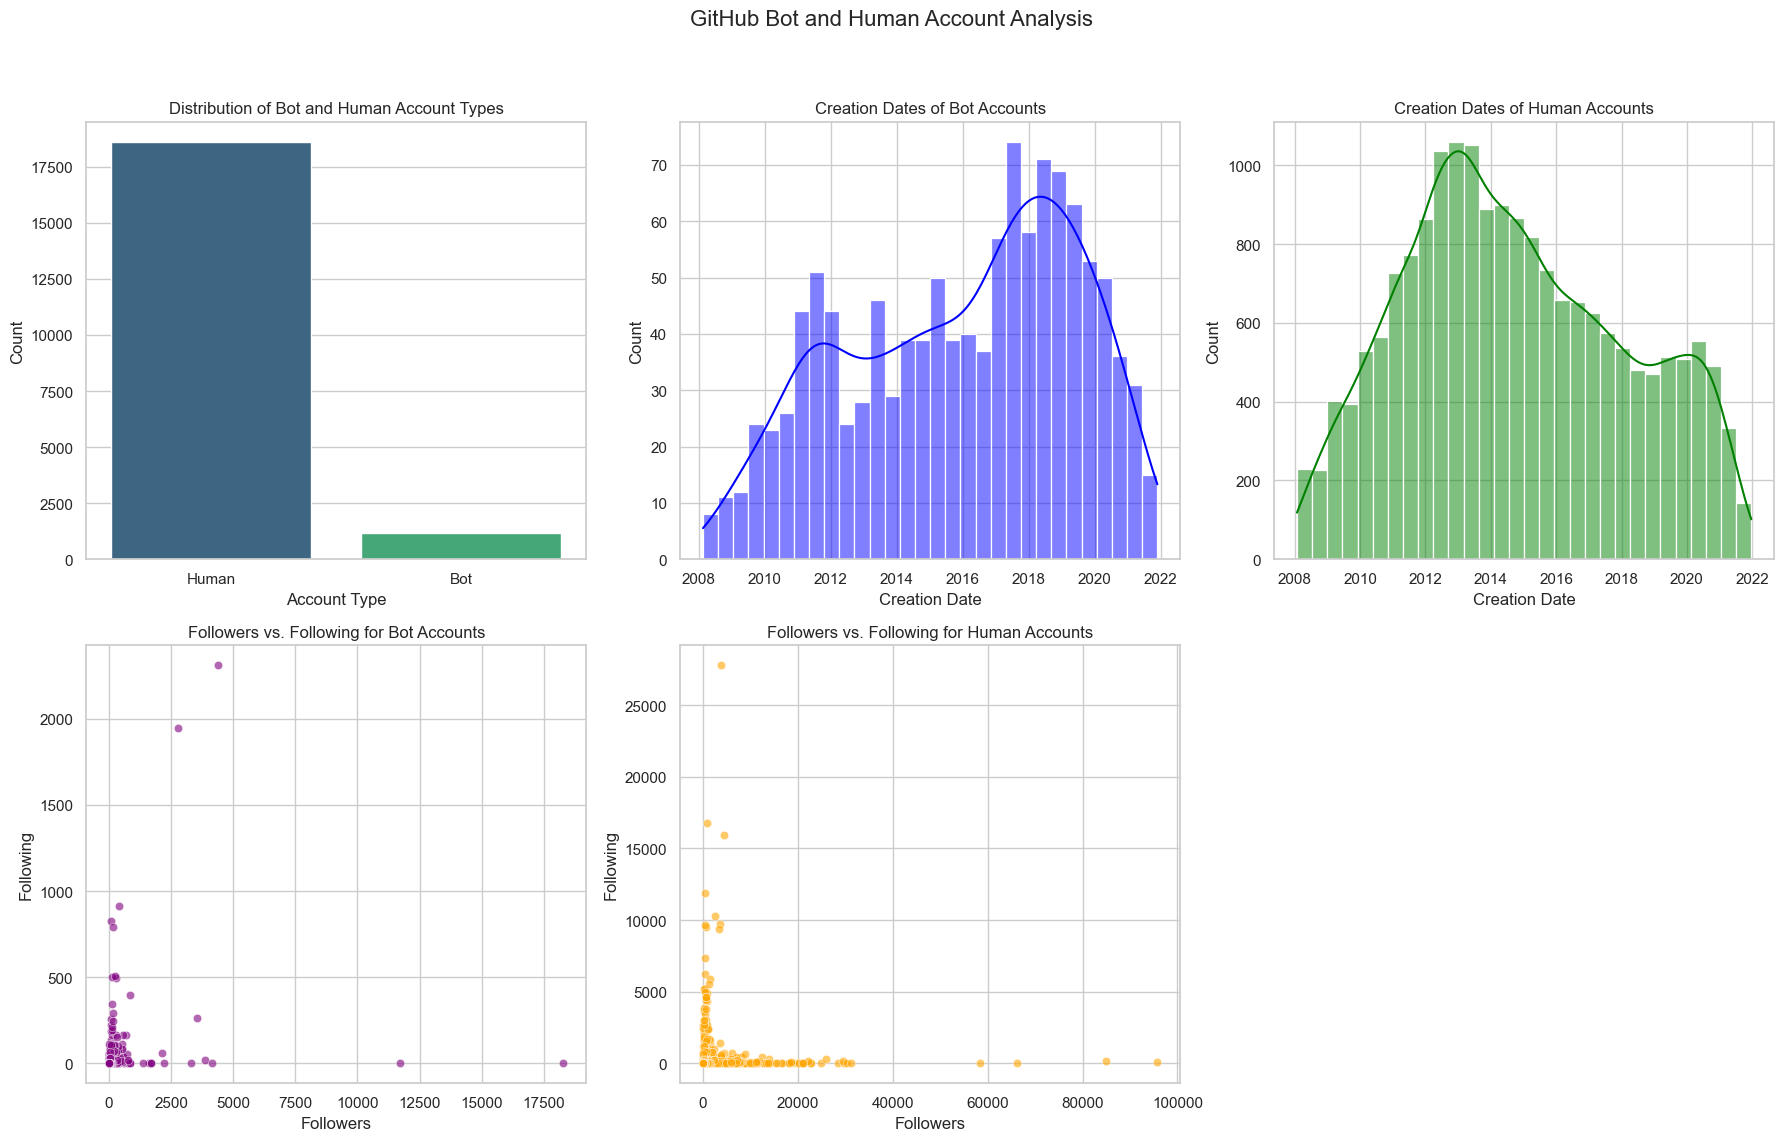

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('data/github_bot_raw_data.csv')
columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url', 
    'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url', 'subscriptions_url', 
    'organizations_url', 'repos_url', 'events_url', 'received_events_url', 'type', 'site_admin', 
    'name', 'company', 'blog', 'location', 'email', 'hireable', 'bio', 'twitter_username', 
    'public_repos', 'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]

data = raw_data[columns].drop_duplicates()

data = data.drop(columns=['gravatar_id']) 
data['site_admin'] = data['site_admin'].fillna(False).astype(bool)
data['hireable'] = data['hireable'].fillna(False).astype(bool)
text_columns = ['company', 'blog', 'location', 'email', 'bio', 'twitter_username']
data[text_columns] = data[text_columns].fillna("")


data['created_at'] = pd.to_datetime(data['created_at']).dt.tz_localize(None)
data['updated_at'] = pd.to_datetime(data['updated_at']).dt.tz_localize(None)

bot_data = data[data['label'] == 'Bot']
human_data = data[data['label'] == 'Human']
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("GitHub Bot and Human Account Analysis", fontsize=16)

# 4.1 选择原因：柱状图能直观地展示两类账号的数量差异，适合类别数据的对比。用于了解总体数据集中 bot 和 human 两类账号的比例分布
#   结果分析：图中显示 human 类型账号数量远多于 bot 类型账号，表明 human 是主流账号类型。
#   数据洞察：过多的 bot 类型账号可能表明 GitHub 上存在大量自动化工具和脚本操作。数据集中 human 和 bot 的比例可以作为对平台健康状况的评估依据。

type_counts = data['label'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Bot and Human Account Types")
axes[0, 0].set_xlabel("Account Type")
axes[0, 0].set_ylabel("Count")

# 4.2 选择原因：使用直方图可以清晰地展示 bot 账号的创建时间分布和集中趋势。
#   结果分析：图表可能显示 bot 账号的创建日期集中在某几个时间段。比如某一年或某几个月的激增，可能与特定自动化工具的发布或流行相关。
#   数据洞察：这些创建时间的峰值可能反映了自动化技术的发展趋势，或表明某些事件（如特定活动或需求）引发了大量 bot 账号的注册。

sns.histplot(bot_data['created_at'], bins=30, kde=True, color="blue", ax=axes[0, 1])
axes[0, 1].set_title("Creation Dates of Bot Accounts")
axes[0, 1].set_xlabel("Creation Date")
axes[0, 1].set_ylabel("Count")

# 4.3 选择原因：同样使用直方图，方便与 bot 的创建时间分布进行对比。
#   结果分析：human 账号的创建可能较为分散，但也可能呈现某些高峰（如开源浪潮的增长期）
#   数据洞察：human 账号的创建高峰可能与 GitHub 的发展和普及有关，例如新增功能、社区活动或技术爆发。
sns.histplot(human_data['created_at'], bins=30, kde=True, color="green", ax=axes[0, 2])
axes[0, 2].set_title("Creation Dates of Human Accounts")
axes[0, 2].set_xlabel("Creation Date")
axes[0, 2].set_ylabel("Count")

# 4.4 选择原因：使用散点图直观展示两个变量之间的关系，是否存在某种趋势或异常值。
#   结果分析：bot 账号的 followers 和 following 数量可能较低，集中于零或较小的数值
#   数据洞察：异常值可能是某些流行的 bot 工具或应用（如广泛关注他人以换取关注的策略）。
sns.scatterplot(x=bot_data['followers'], y=bot_data['following'], color="purple", alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title("Followers vs. Following for Bot Accounts")
axes[1, 0].set_xlabel("Followers")
axes[1, 0].set_ylabel("Following")

# 4.5 选择原因：使用与 bot 相同的散点图方便比较两类账号的行为模式。
#   结果分析：human 类型账号可能表现出较高的 followers 数量分布，高活跃用户拥有大量粉丝。
#   数据洞察：高 followers 用户可能是社区中的意见领袖或核心开发者。数据可以揭示社交网络的结构特点，比如 followers 和 following 的分布规律是否遵循幂律分布（即少数用户拥有大量粉丝）。
sns.scatterplot(x=human_data['followers'], y=human_data['following'], color="orange", alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title("Followers vs. Following for Human Accounts")
axes[1, 1].set_xlabel("Followers")
axes[1, 1].set_ylabel("Following")

axes[1, 2].axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
